In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [5]:
data=pd.read_csv('/content/Wine.csv')


EDA

In [6]:
#To undestand the types of values--all are numerical
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
#To get some statistical information
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
#Checking for null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

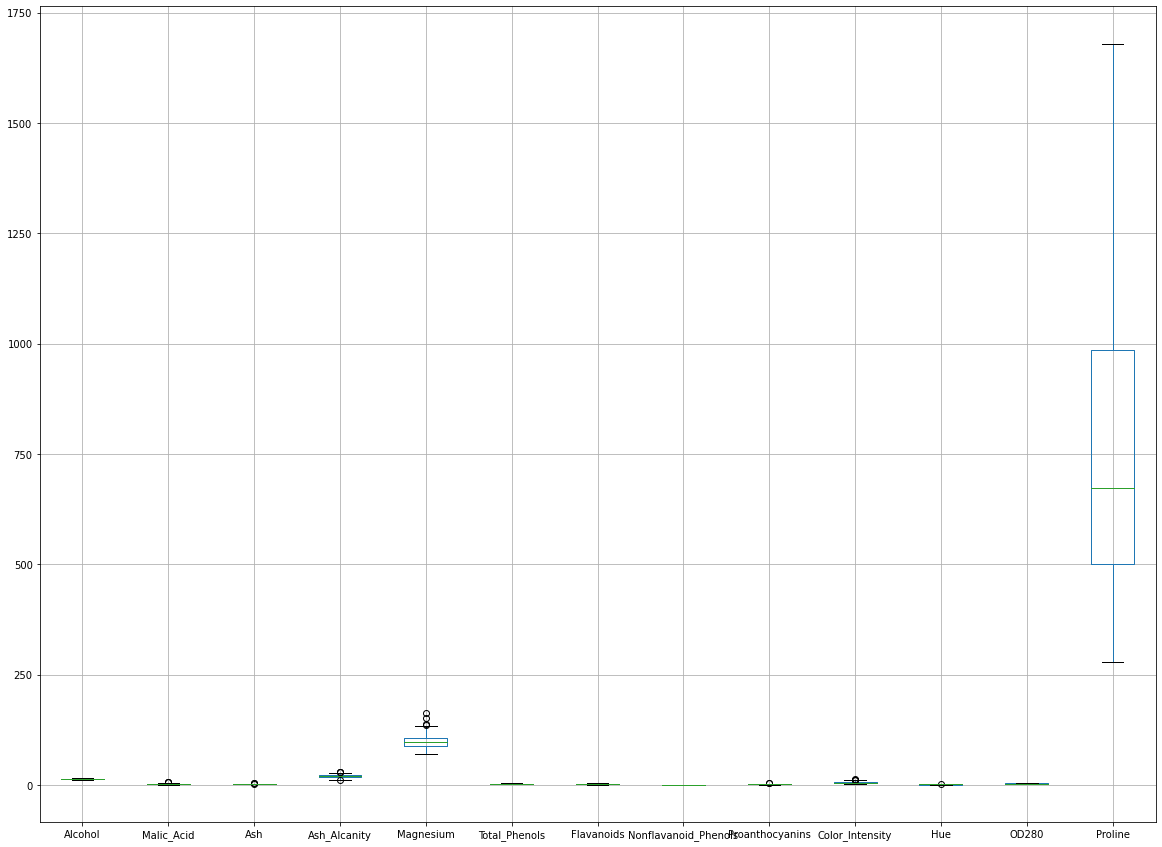

In [10]:
#Checking for outliers
graph=data.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(20,15))
plt.show()

In [11]:
#IQR calculation
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())

Alcohol                 0
Malic_Acid              3
Ash                     3
Ash_Alcanity            4
Magnesium               4
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         2
Color_Intensity         4
Hue                     1
OD280                   0
Proline                 0
dtype: int64


Few outliers are seen,which can be removed.

In [12]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [13]:
for i in ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity', 'Hue']:
         Q1=np.percentile(data[i],25,interpolation='midpoint')
         Q2=np.percentile(data[i],50,interpolation='midpoint')
         Q3=np.percentile(data[i],75,interpolation='midpoint')
         print(Q1,Q2,Q3)
         #Computation of IQR,lower limit and upper limit
         IQR=Q3-Q1
         ll=Q1-1.5*IQR
         ul=Q3+1.5*IQR

         #Identifying outlier values
         outliers=[]
         for x in data[i]:
             if (x>ul)or(x<ll):
               outliers.append(x)
         ind=data[i]>ul
         i=data.loc[ind].index
         data.drop(i,inplace=True)

1.605 1.8650000000000002 3.065
2.21 2.36 2.5549999999999997
17.1 19.1 21.5
88.0 98.0 107.0
1.245 1.5350000000000001 1.9249999999999998
3.26 4.8 6.225
0.795 0.98 1.12


In [14]:
data.shape

(161, 13)

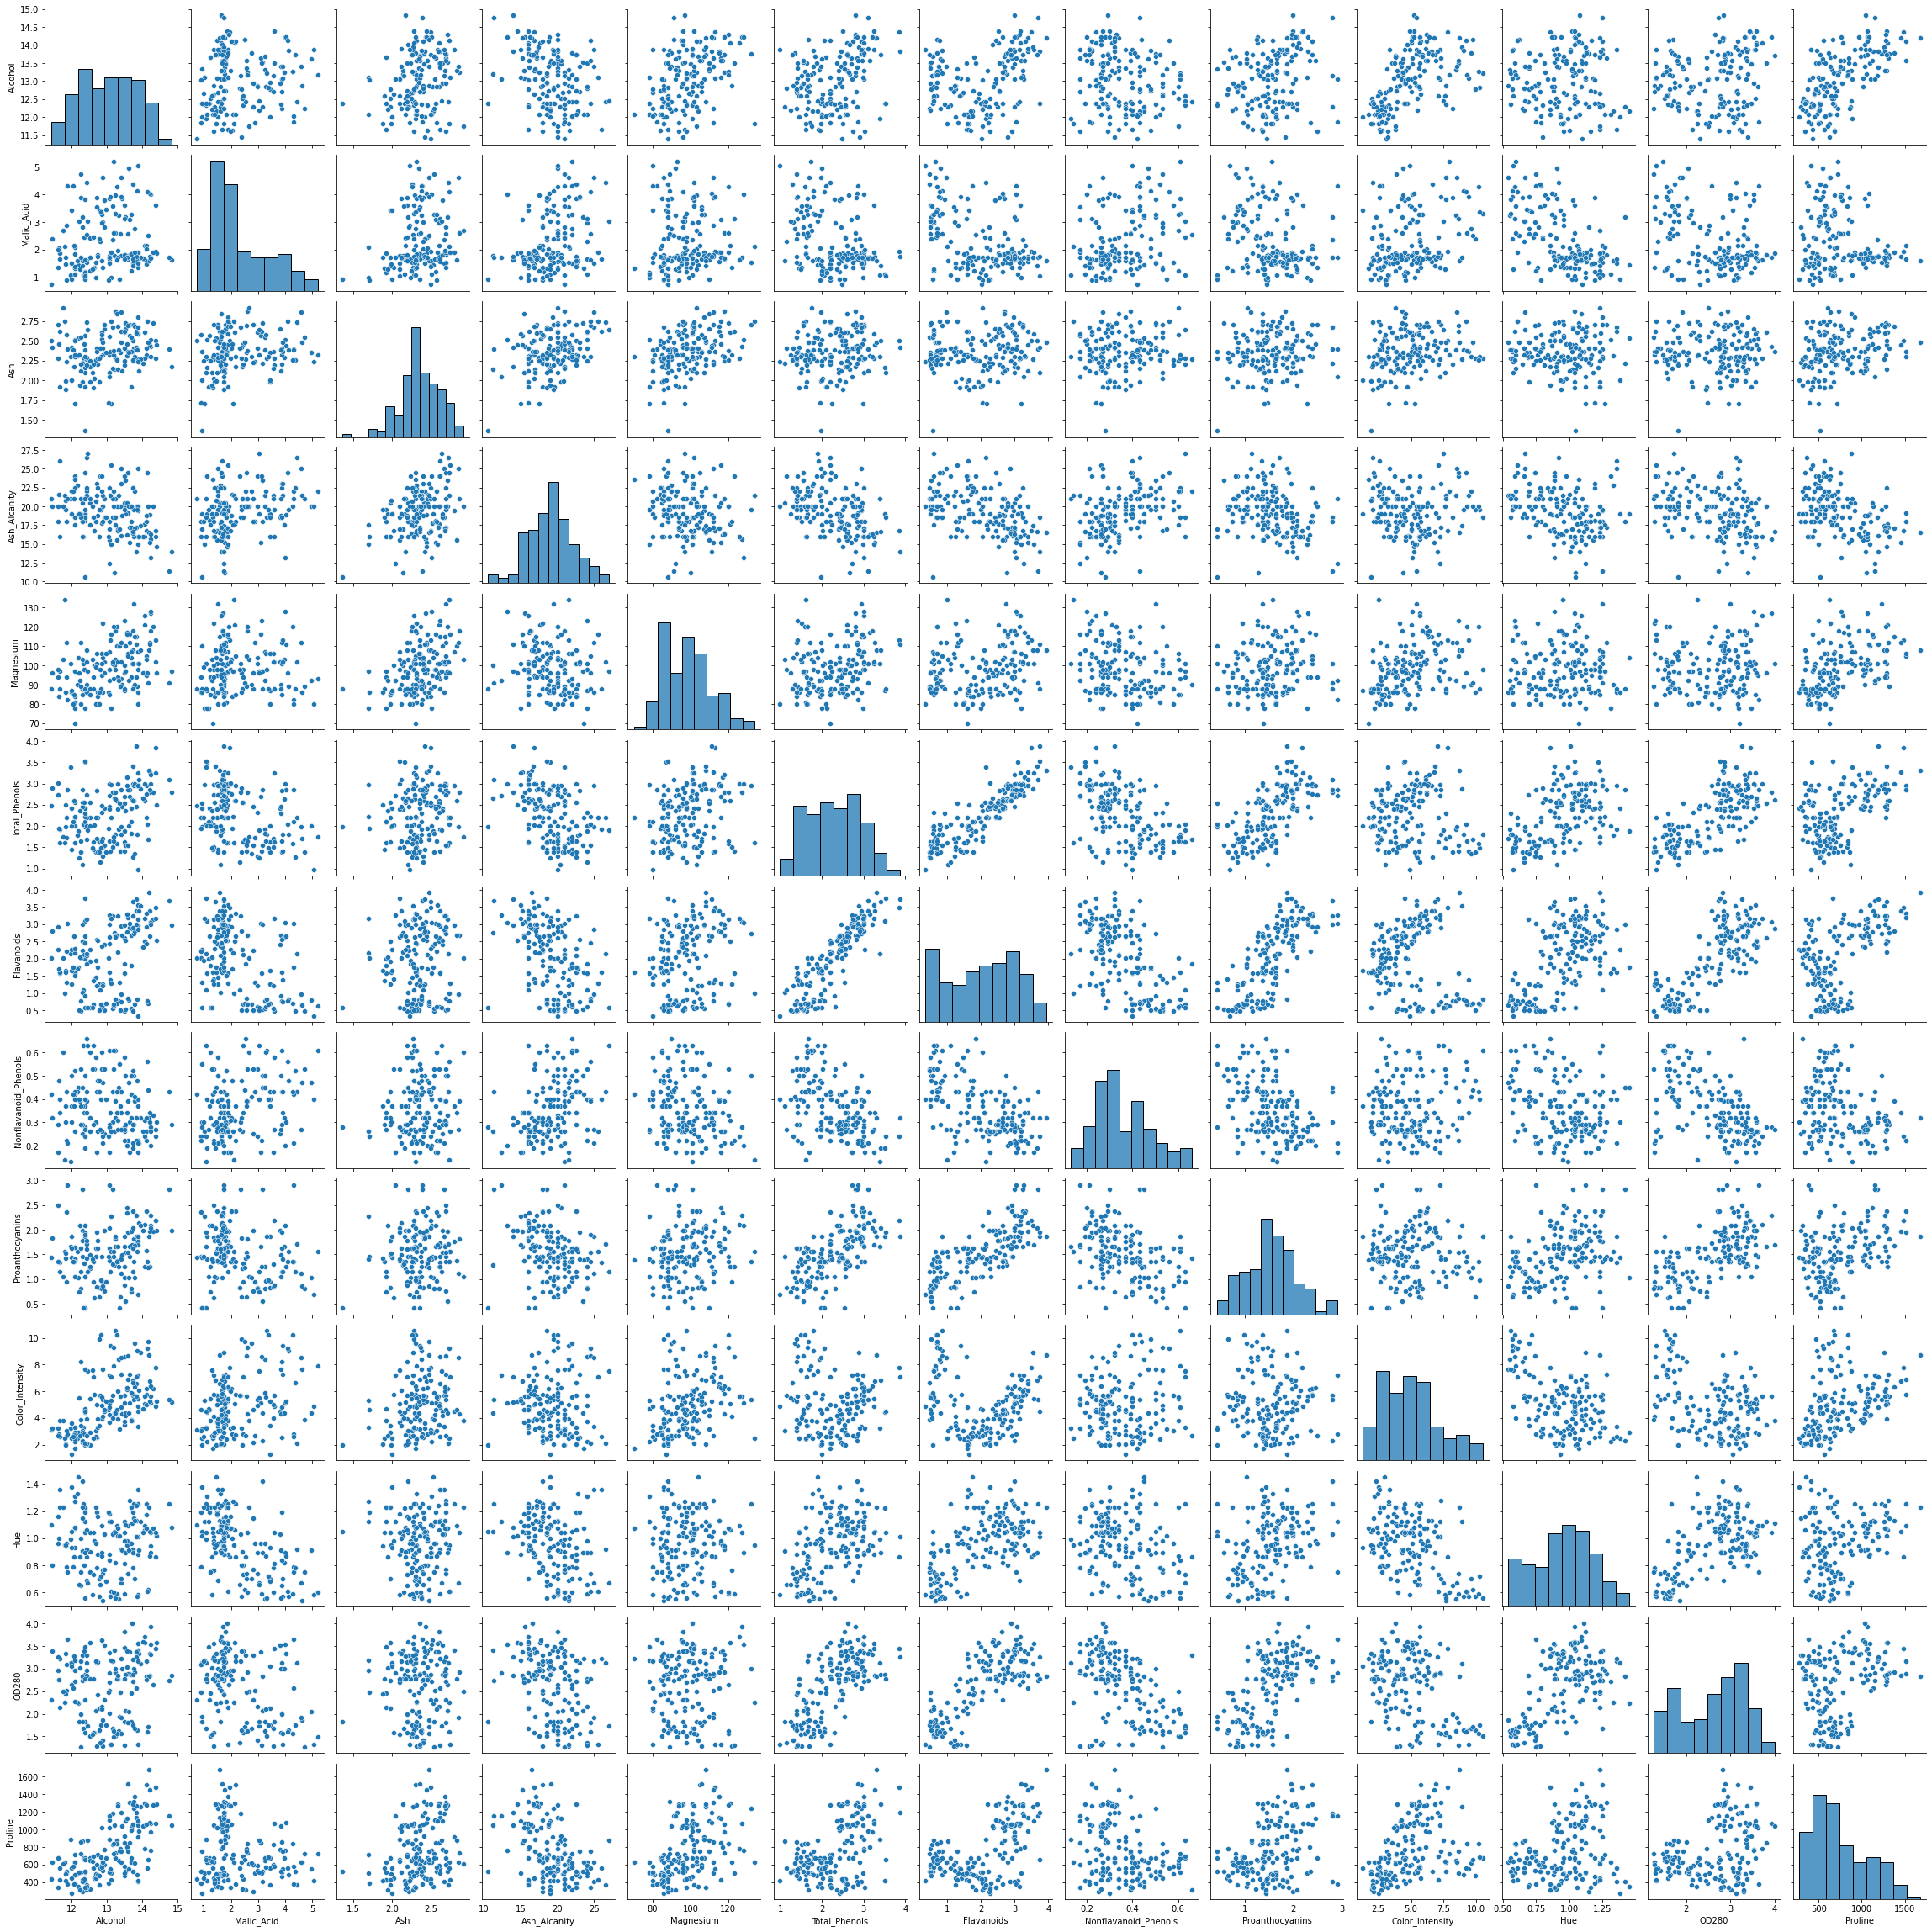

In [16]:
#Bivariate analysis
import seaborn as sns
sns.pairplot(data)
plt.show()

In [17]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.098963,0.231943,-0.320122,0.422170,0.331373,0.312711,-0.173583,0.223733,0.547330,-0.011052,0.119490,0.654974
Malic_Acid,0.098963,1.000000,0.199397,0.317597,0.028767,-0.358697,-0.437713,0.300023,-0.219973,0.298675,-0.582038,-0.379329,-0.174366
Ash,0.231943,0.199397,1.000000,0.362285,0.416721,0.118549,0.084761,0.098747,0.082747,0.223884,-0.048717,0.005076,0.277824
Ash_Alcanity,-0.320122,0.317597,0.362285,1.000000,-0.165981,-0.428780,-0.460389,0.340191,-0.258051,-0.026431,-0.315624,-0.337393,-0.447359
Magnesium,0.422170,0.028767,0.416721,-0.165981,1.000000,0.248513,0.213713,-0.236271,0.110536,0.343492,-0.020816,0.036852,0.454344
Total_Phenols,0.331373,-0.358697,0.118549,-0.428780,0.248513,1.000000,0.879724,-0.493061,0.639630,-0.047263,0.468420,0.704614,0.516762
Flavanoids,0.312711,-0.437713,0.084761,-0.460389,0.213713,0.879724,1.000000,-0.585931,0.743923,-0.141180,0.580666,0.784735,0.527483
Nonflavanoid_Phenols,-0.173583,0.300023,0.098747,0.340191,-0.236271,-0.493061,-0.585931,1.000000,-0.415322,0.108042,-0.279418,-0.517347,-0.306323
Proanthocyanins,0.223733,-0.219973,0.082747,-0.258051,0.110536,0.639630,0.743923,-0.415322,1.000000,-0.020022,0.334669,0.592862,0.370972
Color_Intensity,0.547330,0.298675,0.223884,-0.026431,0.343492,-0.047263,-0.141180,0.108042,-0.020022,1.000000,-0.488184,-0.398697,0.375559


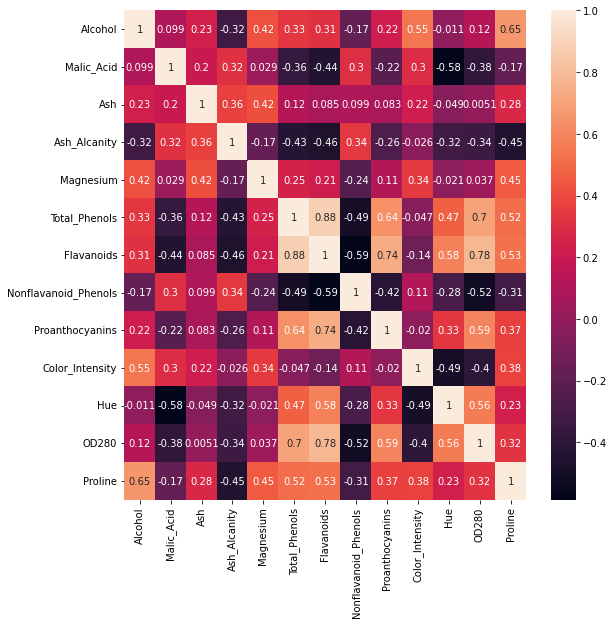

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

Standard scaling

In [15]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_cluster=data.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [30]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 58.78%


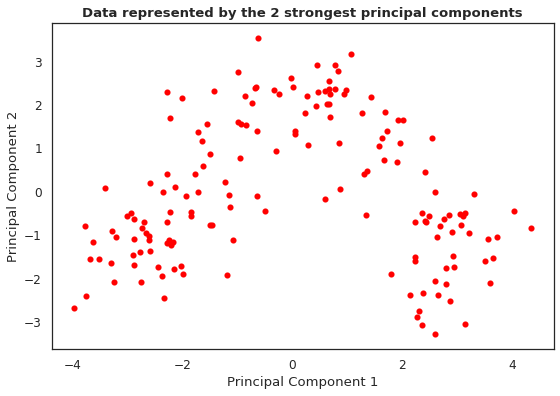

In [31]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

2093.0000000000005
1460.5176825951366
1088.8105649488894
1004.1931092662059
944.4525326787424
893.2397568157819
844.1895657618824
820.4989452233118
773.4603952729694
753.1428956773491


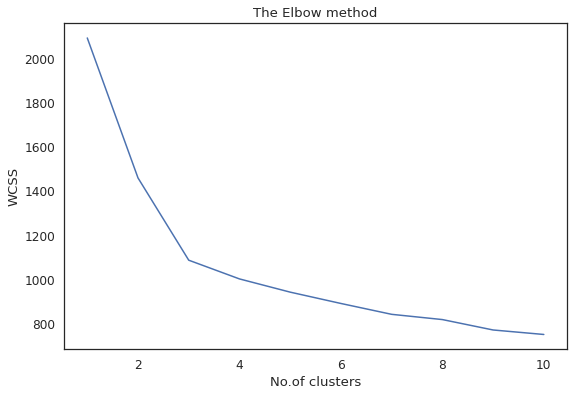

In [32]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
     kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
     kmeans.fit(data_cluster)
     wcss.append(kmeans.inertia_)
     print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:01<00:00,  4.57it/s]


In [40]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:01<00:00,  4.79it/s]


In K=3 all the metrics indicates that it is the best clusters number. 

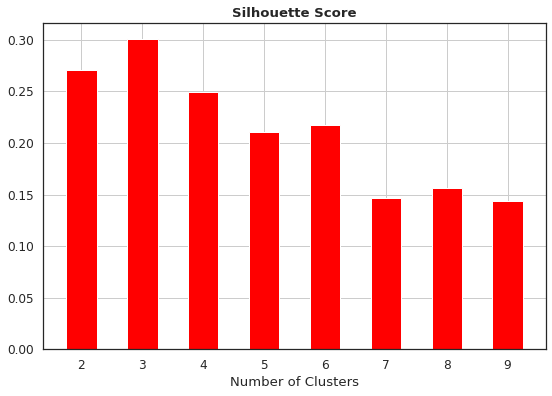

In [41]:
plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')
plt.show()

In [42]:
kmeans = cluster.KMeans(n_clusters=3,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"


0    59
1    57
2    45
dtype: int64

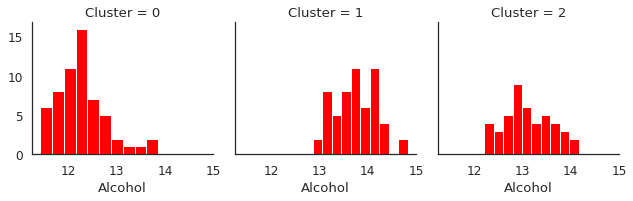

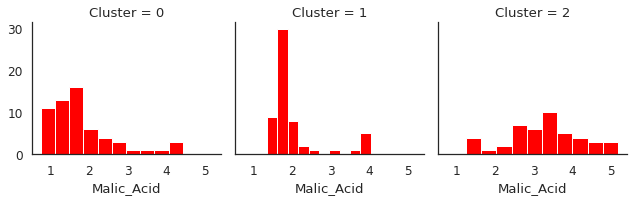

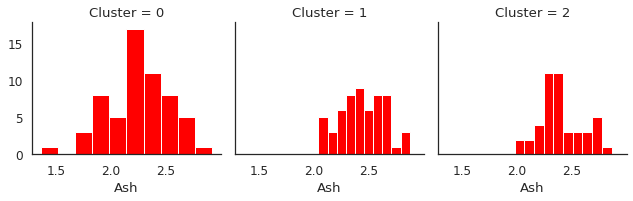

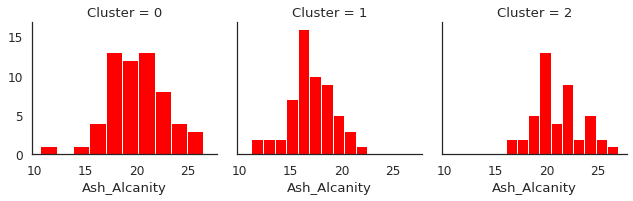

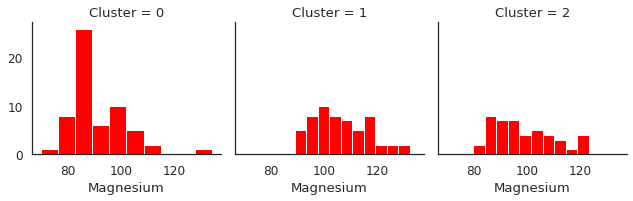

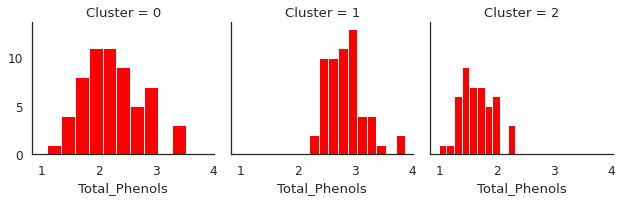

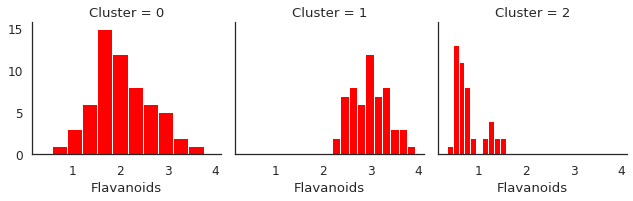

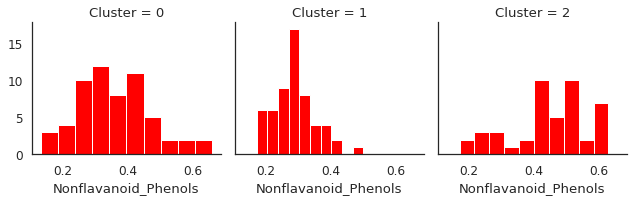

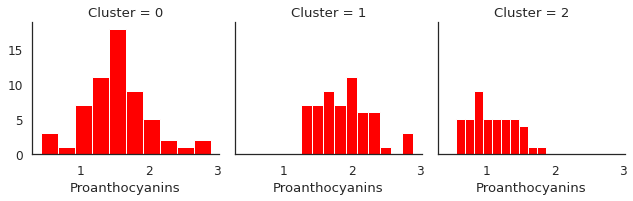

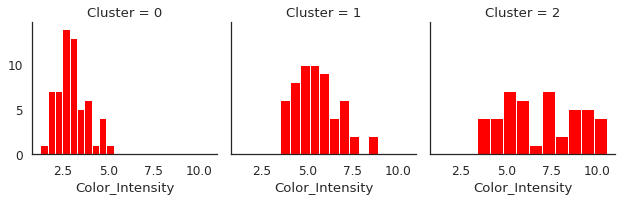

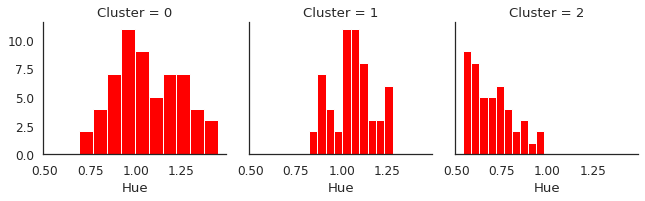

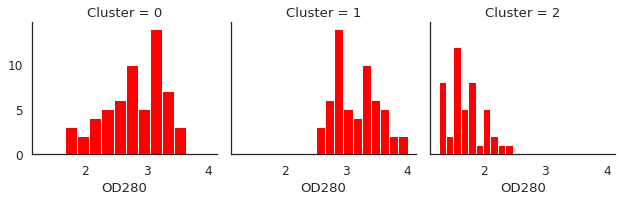

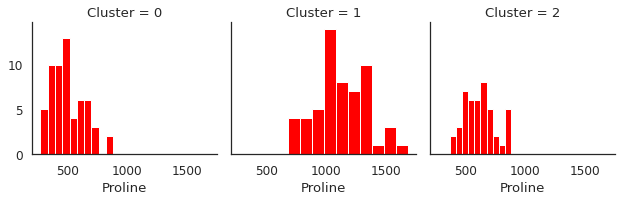

In [43]:
data2=data.copy()
data2['Cluster']=kmeans_labels

aux=data2.columns.tolist()
aux[0:len(aux)-1]

for cluster in aux[0:len(aux)-1]:
    grid= sns.FacetGrid(data2, col='Cluster')
    grid.map(plt.hist, cluster,color='red')

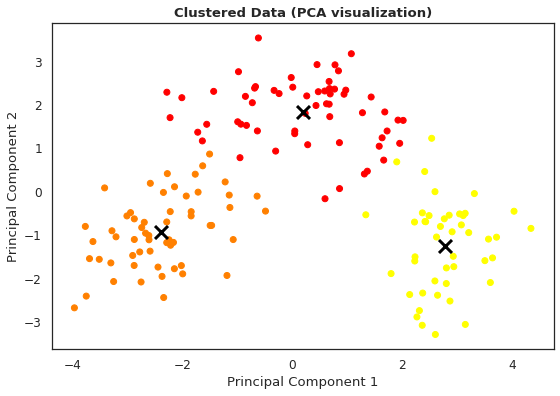

In [45]:
#PCA data visulaization
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

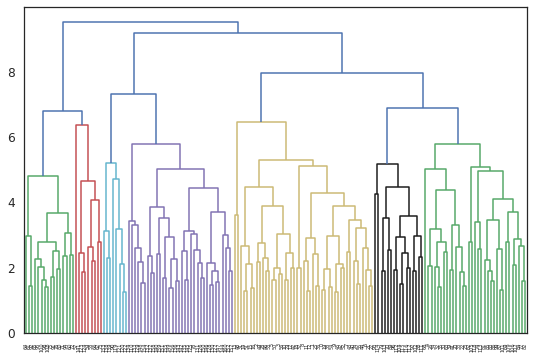

In [46]:
#Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
mergings_complete = linkage(data_cluster, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [58]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data_cluster)
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

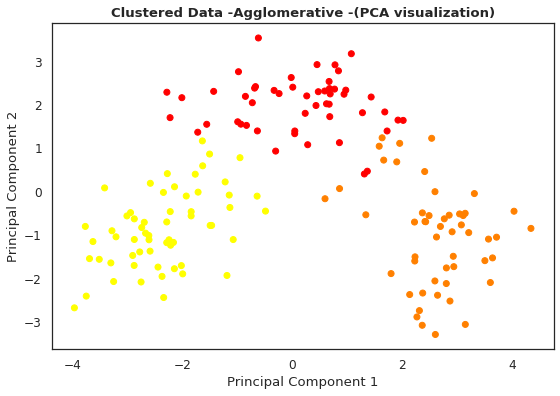

In [60]:

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=y_hc, cmap='autumn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data -Agglomerative -(PCA visualization)',fontweight='bold')
plt.show()